<div class="alert alert-block alert-info"><b><h1>Random Forest Classification

<div class="alert alert-block alert-info"><em>Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<div class="alert alert-block alert-info"><em>Importing the dataset

<div class="alert alert-block alert-warning"><em>Test Dataset

In [2]:
df_test = pd.read_csv("Airline_Passenger_Satisfaction_Test_Cleaned.csv")
df_test.head()

,id,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiservice,DepartureArrivalTimeCconvenient,EaseOfOnlineBooking,...,InflightEntertainment,OnBoardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,ArrivalDelayInMinutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
4,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied


<div class="alert alert-block alert-warning"><em>Train Dataset

In [3]:
df_train = pd.read_csv("Airline_Passenger_Satisfaction_Train_Cleaned.csv")
df_train.head()

,id,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiservice,DepartureArrivalTimeCconvenient,EaseOfOnlineBooking,...,InflightEntertainment,OnBoardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,ArrivalDelayInMinutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


<div class="alert alert-block alert-info"><b><h3>Data Preparation for the Random Forest Classification Using a Test and Train Set</h3></b></div>

In [4]:
df_train = pd.read_csv("Airline_Passenger_Satisfaction_Train_Cleaned.csv")
df_test = pd.read_csv("Airline_Passenger_Satisfaction_Test_Cleaned.csv")

def conv_cat(data):
    data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
    data['CustomerType'] = data['CustomerType'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
    data['TypeOfTravel'] = data['TypeOfTravel'].map({'Personal Travel':0, 'Business travel':1})
    data['Class'] = data['Class'].map({'Business':2, 'Eco Plus':1, 'Eco':0})
    data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied':0, 'satisfied':1})
    data = pd.get_dummies(data)
    data.drop('id',axis=1,inplace=True)
    data.fillna(0,inplace=True)
    return data
df_train = conv_cat(df_train)
df_test = conv_cat(df_test)

<div class="alert alert-block alert-warning"><em>Test Dataset

In [5]:
df_test.head()

,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiservice,DepartureArrivalTimeCconvenient,EaseOfOnlineBooking,GateLocation,...,InflightEntertainment,OnBoardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,ArrivalDelayInMinutes,satisfaction
0,1,1,52,1,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,1,36,1,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,0,0,20,1,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,1,49,1,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1
4,0,1,16,1,0,311,3,3,3,3,...,5,4,3,1,1,2,5,0,0.0,1


<div class="alert alert-block alert-warning"><em>Train Dataset

In [7]:
df_train.head()

,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiservice,DepartureArrivalTimeCconvenient,EaseOfOnlineBooking,GateLocation,...,InflightEntertainment,OnBoardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,ArrivalDelayInMinutes,satisfaction
0,0,1,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


<div class="alert alert-block alert-info"><b><h3>Random Forest Classification</h3></b></div>

In [9]:
X = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values

In [10]:
print(X)

[[ 0.  1. 13. ...  5. 25. 18.]
 [ 0.  0. 25. ...  1.  1.  6.]
 [ 1.  1. 26. ...  5.  0.  0.]
 ...
 [ 0.  0. 30. ...  4.  7. 14.]
 [ 1.  0. 22. ...  1.  0.  0.]
 [ 0.  1. 27. ...  1.  0.  0.]]


In [11]:
print(y)

[0 0 1 ... 0 0 0]


<div class="alert alert-block alert-info"><em>Here, we Split the dataset into the Training set and Test set.</em></div>

In [12]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [13]:
print(X_train)

[[ 0.  0. 28. ...  4.  0.  0.]
 [ 0.  1. 50. ...  5. 35. 42.]
 [ 0.  1. 29. ...  4.  0.  0.]
 ...
 [ 0.  1. 59. ...  3. 34. 16.]
 [ 1.  0. 25. ...  4.  0.  0.]
 [ 1.  0. 42. ...  3. 67. 86.]]


In [14]:
print(y_train)

[0 1 1 ... 1 1 0]


In [15]:
print(X_test)

[[ 1.  1. 60. ...  3. 12.  0.]
 [ 1.  1. 65. ...  1.  0.  0.]
 [ 0.  1. 37. ...  2.  0.  0.]
 ...
 [ 1.  1. 31. ...  3.  0.  0.]
 [ 0.  1. 41. ...  3. 66. 65.]
 [ 1.  1. 26. ...  4. 16. 11.]]


In [16]:
print(y_test)

[1 0 0 ... 0 0 1]


<div class="alert alert-block alert-info"><em>Feature Scaling</em></div>

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
print(X_train)

[[-1.01727401 -2.03147246 -0.72737319 ...  0.55812638 -0.38461776
  -0.3886915 ]
 [-1.01727401  0.49225378  0.7114052  ...  1.31769773  0.52243541
   0.68838197]
 [-1.01727401  0.49225378 -0.66197418 ...  0.55812638 -0.38461776
  -0.3886915 ]
 ...
 [-1.01727401  0.49225378  1.29999636 ... -0.20144497  0.4965196
   0.0216222 ]
 [ 0.98301931 -2.03147246 -0.92357025 ...  0.55812638 -0.38461776
  -0.3886915 ]
 [ 0.98301931 -2.03147246  0.18821306 ... -0.20144497  1.35174117
   1.81674465]]


In [19]:
print(X_test)

[[ 0.98301931  0.49225378  1.36539538 ... -0.20144497 -0.0736281
  -0.3886915 ]
 [ 0.98301931  0.49225378  1.69239047 ... -1.72058766 -0.38461776
  -0.3886915 ]
 [-1.01727401  0.49225378 -0.13878203 ... -0.96101631 -0.38461776
  -0.3886915 ]
 ...
 [ 0.98301931  0.49225378 -0.53117614 ... -0.20144497 -0.38461776
  -0.3886915 ]
 [-1.01727401  0.49225378  0.12281404 ... -0.20144497  1.32582536
   1.27820791]
 [ 0.98301931  0.49225378 -0.85817123 ...  0.55812638  0.03003512
  -0.10660083]]


<div class="alert alert-block alert-info"><em>Training the Random Forest Classification model on the Training set</em></div>

In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

<div class="alert alert-block alert-info"><em>Predicting a new result
'Gender': [0]
'CustomerType': [1]
'Age': [13]
'TypeOfTravel': [0]
'Class': [1]
'FlightDistance': [460]
'InflightWifiservice': [3]
'DepartureArrivalTimeCconvenient': [4]
'EaseOfOnlineBooking': [3]
'GateLocation': [1]
'FoodAndDrink': [5]
'OnlineBoarding': [3]
'SeatComfort': [5]
'InflightEntertainment': [5]
'OnBoardService': [4]
'LegRoomService': [3]
'BaggageHandling': [4]
'CheckinService': [4]
'InflightService': [5]
'Cleanliness': [5]
'DepartureDelayInMinutes': [25]
'ArrivalDelayInMinutes': [18]

In [21]:
print(classifier.predict(sc.transform([[0, 1, 13, 0, 1, 460, 3, 4, 3, 
                                        1, 5, 3, 5, 5, 4, 3, 4, 4, 
                                        5, 5, 25, 18]])))

[0]


<div class="alert alert-block alert-info"><em>Predicting the Test set results</em></div>

In [22]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


<div class="alert alert-block alert-info"><em>Making the Confusion Matrix</em></div>

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14006   286]
 [  826  9194]]


0.9542612701546561

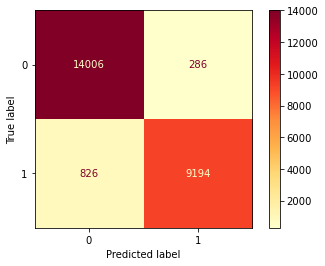

In [37]:
# Import the confusion matrix
from sklearn.metrics import plot_confusion_matrix

# Plot Confusion matrix
plot_confusion_matrix(classifier, X_test, y_test, values_format='d', cmap='YlOrRd')